In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import statsmodels.formula.api as smf
from scipy.optimize import leastsq
from scipy.optimize import fmin_bfgs
seaborn.set()

## CHAPTER 7 Hypothesis Tests and Confidence Intervals in Multiple Regression

In [2]:
data = pd.read_csv('https://github.com/poposoto/Programming-Assignments/blob/master/Introduction%20to%20Econometrics/str.csv?raw=true')
y = data.score
x1 = data.strat
x2 = data.exppup / 1000
x3 = data.eng

In [3]:
model = smf.ols('y ~ x1 + x2 + x3', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     107.4
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           1.68e-51
Time:                        23:14:09   Log-Likelihood:                -1712.8
No. Observations:                 420   AIC:                             3434.
Df Residuals:                     416   BIC:                             3450.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    649.5814     15.207     42.717      0.0

In [4]:
robust = model.get_robustcov_results()
print(robust.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     147.1
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           5.61e-65
Time:                        23:14:09   Log-Likelihood:                -1712.8
No. Observations:                 420   AIC:                             3434.
Df Residuals:                     416   BIC:                             3450.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    649.5814     15.457     42.025      0.0

### 7.2 Tests of Joint Hypotheses

#### heteroskedasticity-robust F-statistic p.226

In [5]:
print(robust.f_test('x1 = 0, x2 = 0'))

<F test: F=array([[5.431559]]), p=0.004692207882681964, df_denom=416, df_num=2>


#### homoskedasticity-only F-statistic p.228
approach1 directly

In [6]:
print(model.f_test('x1 = 0, x2 = 0'))

<F test: F=array([[8.00342272]]), p=0.0003884740659421272, df_denom=416, df_num=2>


approach2 by $R^2$

In [7]:
restricted = smf.ols('y ~ x3', data).fit()
print((model.rsquared - restricted.rsquared) /
      (model.df_model - restricted.df_model) /
      (1 - model.rsquared) * model.df_resid)

8.003422717725597


approach3 by $SSR$

In [8]:
print((restricted.ssr - model.ssr) / (model.df_model - restricted.df_model) /
      model.ssr * model.df_resid)

8.003422717725604


### 7.3 Testing Single Restrictions Involving Multiple Coefficients

#### approach1 test the restriction directly

In [9]:
print(robust.f_test('x1 = x2'))

<F test: F=array([[8.93871521]]), p=0.0029576196110182333, df_denom=416, df_num=1>


In [10]:
print(robust.t_test('x1 = x2'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -4.1532      1.389     -2.990      0.003      -6.884      -1.423


#### approach2 transform the regression

In [11]:
w = x1 + x2
transform = smf.ols('y ~ x1 + w + x3', data).fit().get_robustcov_results()
print(transform.t_test('x1'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -4.1532      1.389     -2.990      0.003      -6.884      -1.423


## CHAPTER 8  Nonlinear Regression Functions

[(600, 740), (0, 60)]

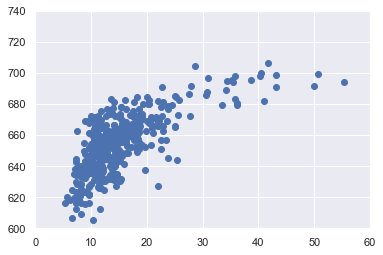

In [12]:
data2 = pd.read_excel('https://github.com/poposoto/Programming-Assignments/blob/master/Introduction%20to%20Econometrics/caschool.xlsx?raw=true')
testscore = data2.testscr
income = data2.avginc
fig, ax = plt.subplots()
ax.scatter(income, testscore)
ax.set(xlim=[0, 60], ylim=[600, 740])

### 8.1  A General Strategy for Modeling Nonlinear Regression Functions

#### Standard errors of estimated effects p.264

In [13]:
quadratic = smf.ols('testscore ~ income + I(income ** 2)', data2).fit()
quadratic = quadratic.get_robustcov_results()
print(quadratic.summary())

                            OLS Regression Results                            
Dep. Variable:              testscore   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     428.5
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          7.37e-102
Time:                        23:15:01   Log-Likelihood:                -1662.7
No. Observations:                 420   AIC:                             3331.
Df Residuals:                     417   BIC:                             3344.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        607.3017      2.902    209.

#### approach1 directly

In [14]:
print(quadratic.f_test('income + 21 * I(income ** 2)'))

<F test: F=array([[299.9422744]]), p=5.120585296070162e-51, df_denom=417, df_num=1>


In [15]:
print(quadratic.t_test('income + 21 * I(income ** 2)'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             2.9625      0.171     17.319      0.000       2.626       3.299


#### approach2 transform the regression

In [16]:
z = income ** 2 - 21 * income
transform2 = smf.ols('testscore ~ income + z', data2).fit()
transform2 = transform2.get_robustcov_results()
print(transform2.t_test('income'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             2.9625      0.171     17.319      0.000       2.626       3.299


### 8.2  Nonlinear Functions of a Single Independent Variable

[(6.4, 6.6), (0, 60)]

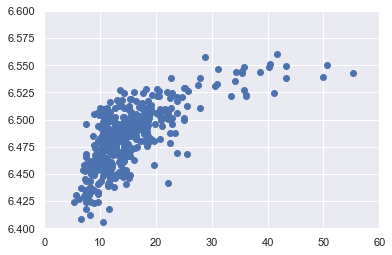

In [17]:
fig, ax = plt.subplots()
ax.scatter(income, np.log(testscore))
ax.set(xlim=[0, 60], ylim=[6.4, 6.6])

### 8.3  Interactions Between Independent Variables

#### Application to the student–teacher ratio and the percentage of English learners p.284

In [18]:
stratio = data2.str
interaction = smf.ols('testscore ~ stratio + I(el_pct > 10) + '
                      + 'I(stratio * (el_pct > 10))', data2).fit()
interaction = interaction.get_robustcov_results()
print(interaction.summary())

                            OLS Regression Results                            
Dep. Variable:              testscore   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     63.67
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           6.74e-34
Time:                        23:15:01   Log-Likelihood:                -1755.3
No. Observations:                 420   AIC:                             3519.
Df Residuals:                     416   BIC:                             3535.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#### evaluate the policy that reduces the student–teacher ratio by 2 only in districts with a high fraction of English learners
approach1 directly

In [19]:
print(interaction.t_test('-2 * stratio - 2 * I(stratio * (el_pct > 10))'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             4.4901      1.533      2.928      0.004       1.476       7.504


approach2 transform the regression

In [20]:
zz = stratio * (data2.el_pct > 10) - stratio
transform3 = smf.ols('testscore ~ stratio + I(el_pct > 10) + zz', data2).fit()
transform3 = transform3.get_robustcov_results()
print(transform3.t_test('-2 * stratio'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             4.4901      1.533      2.928      0.004       1.476       7.504


#### test whether the two lines are in fact the same

<F test: F=array([[89.93943807]]), p=3.4558179292062126e-33, df_denom=416, df_num=2>


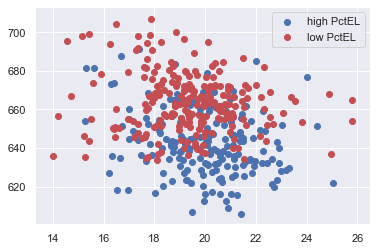

In [21]:
print(interaction.f_test('I(el_pct > 10)[T.True] = 0,'
                         + 'I(stratio * (el_pct > 10)) = 0'))
fig, ax = plt.subplots()
ax.scatter(stratio[data2.el_pct > 10], testscore[data2.el_pct > 10],
           c='b', label='high PctEL')
ax.scatter(stratio[data2.el_pct <= 10], testscore[data2.el_pct <= 10],
           c='r', label='low PctEL')
ax.legend();

### 8.4 Nonlinear Effects on Test Scores  of the Student–Teacher Ratio

In [22]:
mod1 = smf.ols('testscore ~ stratio + el_pct + meal_pct', data2).fit()
mod1 = mod1.get_robustcov_results()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:              testscore   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     453.5
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          1.05e-130
Time:                        23:15:02   Log-Likelihood:                -1520.5
No. Observations:                 420   AIC:                             3049.
Df Residuals:                     416   BIC:                             3065.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    700.1500      5.568    125.735      0.0

In [23]:
mod2 = smf.ols('testscore ~ stratio + el_pct + meal_pct +'
               + 'np.log(income)', data2).fit().get_robustcov_results()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:              testscore   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     417.2
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          6.40e-144
Time:                        23:15:02   Log-Likelihood:                -1499.3
No. Observations:                 420   AIC:                             3009.
Df Residuals:                     415   BIC:                             3029.
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        658.5520      8.642     76.

In [24]:
mod12 = smf.ols('testscore ~ stratio + el_pct + np.log(income)', data2).fit()
mod12 = mod12.get_robustcov_results()
print(mod12.summary())

                            OLS Regression Results                            
Dep. Variable:              testscore   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     356.6
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          1.37e-114
Time:                        23:15:02   Log-Likelihood:                -1571.8
No. Observations:                 420   AIC:                             3152.
Df Residuals:                     416   BIC:                             3168.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        593.4803      6.895     86.

In [25]:
mod1_params = pd.Series(mod1.params, index=mod1.model.exog_names)
mod2_params = pd.Series(mod2.params, index=mod2.model.exog_names)
mod12_params = pd.Series(mod12.params, index=mod12.model.exog_names)
compare12 = pd.concat([mod1_params, mod2_params, mod12_params],
                      axis=1, sort=False)
compare12.columns = ['(1)', '(2)', '(12)']
print(compare12)

                       (1)         (2)        (12)
Intercept       700.149965  658.551953  593.480343
stratio          -0.998309   -0.734326   -0.385338
el_pct           -0.121573   -0.175534   -0.429293
meal_pct         -0.547346   -0.398234         NaN
np.log(income)         NaN   11.568965   28.362221


In [26]:
mod5 = smf.ols('testscore ~ stratio + I(stratio ** 2) + I(stratio ** 3) +'
               + 'I(el_pct > 10) + meal_pct + np.log(income)', data2).fit()
mod5 = mod5.get_robustcov_results()
print(mod5.summary())

                            OLS Regression Results                            
Dep. Variable:              testscore   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     281.1
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          2.03e-142
Time:                        23:15:03   Log-Likelihood:                -1494.2
No. Observations:                 420   AIC:                             3002.
Df Residuals:                     413   BIC:                             3031.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                252

In [27]:
mod51 = smf.ols('testscore ~ stratio + I(stratio ** 2) +'
               + 'I(el_pct > 10) + meal_pct + np.log(income)', data2).fit()
mod51 = mod51.get_robustcov_results()
print(mod51.summary())

                            OLS Regression Results                            
Dep. Variable:              testscore   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     335.2
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          4.68e-143
Time:                        23:15:03   Log-Likelihood:                -1497.9
No. Observations:                 420   AIC:                             3008.
Df Residuals:                     414   BIC:                             3032.
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                697

In [28]:
mod52 = smf.ols('testscore ~ stratio + I(stratio ** 2) +'
                + 'I(stratio ** 3) + I(stratio ** 4) +'
                + 'I(el_pct > 10) + meal_pct + np.log(income)', data2).fit()
mod52 = mod52.get_robustcov_results()
print(mod52.summary())

                            OLS Regression Results                            
Dep. Variable:              testscore   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     277.6
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          2.47e-141
Time:                        23:15:03   Log-Likelihood:                -1494.1
No. Observations:                 420   AIC:                             3004.
Df Residuals:                     412   BIC:                             3037.
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                523

D:\anaconda\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 6
  'rank is %d' % (J, J_), ValueWarning)


In [29]:
mod53 = smf.ols('testscore ~ stratio + I(stratio ** 2) +'
                + 'I(stratio ** 3) + I(stratio ** 4) + I(stratio ** 5) +'
                + 'I(el_pct > 10) + meal_pct + np.log(income)', data2).fit()
mod53 = mod53.get_robustcov_results()
print(mod53.summary())

                            OLS Regression Results                            
Dep. Variable:              testscore   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     236.6
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          7.20e-140
Time:                        23:15:03   Log-Likelihood:                -1493.8
No. Observations:                 420   AIC:                             3006.
Df Residuals:                     411   BIC:                             3042.
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5135

D:\anaconda\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  'rank is %d' % (J, J_), ValueWarning)


In [30]:
mod5_pv = pd.Series(mod5.pvalues, index=mod5.model.exog_names)
mod51_pv = pd.Series(mod51.pvalues, index=mod51.model.exog_names)
mod52_pv = pd.Series(mod52.pvalues, index=mod52.model.exog_names)
mod53_pv = pd.Series(mod53.pvalues, index=mod53.model.exog_names)
compare5 = pd.concat([mod5_pv, mod51_pv, mod52_pv, mod53_pv],
                     axis=1, sort=False)
compare5.columns = ['(5)', '(51)', '(52)', '(53)']
print(compare5)

                                 (5)          (51)          (52)          (53)
Intercept               1.242454e-01  1.687071e-63  6.352149e-01  4.319274e-01
I(el_pct > 10)[T.True]  1.936167e-07  4.922960e-08  1.898687e-07  1.481672e-07
stratio                 9.994147e-03  1.630842e-01  9.719839e-01  3.791836e-01
I(stratio ** 2)         6.423264e-03  2.367501e-01  9.573166e-01  3.801264e-01
I(stratio ** 3)         4.513575e-03           NaN  8.784374e-01  3.785057e-01
meal_pct                9.457924e-40  1.115982e-39  1.858624e-39  1.734225e-39
np.log(income)          1.039719e-10  1.225095e-10  1.090228e-10  1.860770e-10
I(stratio ** 4)                  NaN           NaN  7.954036e-01  3.738245e-01
I(stratio ** 5)                  NaN           NaN           NaN  3.659456e-01


### Appendix 8.1 Regression Functions That Are Nonlinear in the Parameters

In [31]:
_negexp = lambda b: testscore - b[0] * (1 - np.exp(-b[1] * (income - b[2])))
t = leastsq(_negexp, [750, 0, 0], full_output=True)
negexp = lambda b: np.sum(_negexp(b) ** 2)
tt = fmin_bfgs(negexp, [750, 0, 0], full_output=True)
fopt = tt[1]
Bopt = tt[3]
sigma_sq = fopt / testscore.size
var = sigma_sq * 2 * Bopt
se = np.sqrt(np.diag(var))
res = pd.DataFrame({'coef': tt[0], 'se': se}, index=['beta{0}'.format(I) for I in range(3)])

         Current function value: 66988.395229
         Iterations: 80
         Function evaluations: 792
         Gradient evaluations: 156


In [32]:
display(res)

,coef,se
beta0,703.226603,2.610243
beta1,0.055227,0.006134
beta2,-34.007886,4.348362
